# Analysis pipeline for Gating Task

## Preliminaries

In [1]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [2]:
import datetime
import json
import pathlib

import pandas as pd
import numpy as np
import toolz
from IPython.display import Image, HTML

In [3]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util, automated_analyses
reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)

Loading COCO captions
Loading COCO id2url
Done


/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading ONMT models...
coco_lm_adam_acc_46.00_ppl_16.32_e10_nooptim.pt
Loading model parameters.
coco_cap_adam_acc_48.73_ppl_12.56_e10_nooptim.pt
Loading model parameters.
Ready.
Loading SpaCy...done
Loading COCO captions
Loading COCO id2url
Done
Loading SpaCy...done


(<module 'textrec.analysis_util' from '/Users/kcarnold/code/textrec/src/textrec/analysis_util.py'>,
 <module 'textrec.util' from '/Users/kcarnold/code/textrec/src/textrec/util.py'>,
 <module 'textrec.notebook_util' from '/Users/kcarnold/code/textrec/src/textrec/notebook_util.py'>,
 <module 'textrec.automated_analyses' from '/Users/kcarnold/code/textrec/src/textrec/automated_analyses.py'>)

In [4]:
from textrec.notebook_util import images, id2img, id2url, show_images

In [5]:
# HTML(show_images([images_by_split['val'][0]['cocoid']]))

In [6]:
%matplotlib inline

## Load results of writing experiment

In [7]:
%run -m textrec.batch_analysis

In [8]:
participants = get_participants_by_batch()
participants.keys()

dict_keys(['2018-04-09', '2018-04-24', '2018-04-27', '2018-05-02-invalid', '2018-05-02-old', '2018-05-02', '2018-06-07-gcap', 'gc1'])

In [9]:
#batch = '2018-06-07-gcap'
batch = 'gc1'

In [10]:
len(participants[batch])

3

In [12]:
try:
    summarize(participants[batch])
except Exception as e:
    print(e.message)


x9m97g
________________________________________________________________________________
[Memory] Calling textrec.analysis_util.get_log_analysis_raw...
get_log_analysis_raw('/Users/kcarnold/code/textrec/logs/x9m97g.jsonl', 1416884, git_rev='f57aaec', analysis_files={ 'analyze.js': '76f95f2156828639ea7c756411b37a4e03cdd403',
  'run-analysis': '11083c5f51c5c469297e930142323920f09fe548',
  'src/Analyzer.js': '6e3b1f25e82dfb711f502dafff2bf75855bb32a3'})
_____________________________________________get_log_analysis_raw - 3.4s, 0.1min
practice-0:gated:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:gated:a wine glass filled partially is on a table with a striped cat close next to the glass. 
final-0-1:gated:there is a stand up shower stall with dirty glass and a tan towel hanging outside of it. 
final-0-2:gated:a basic public restroom with a toilet and a sink. 
final-0-3:gated:newlywed husband and wife cut their wedding cake with help of a photographer. 

In [13]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('error')
    analyses = analyze_all(participants[batch], traits='NFC Extraversion Openness Trust')

________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_logprobs_conditional(275449, ('a wine glass filled partially is on a table with a striped cat close next to '
 'the glass.'))
________________________________________eval_logprobs_conditional - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_unconditional...
eval_logprobs_unconditional(('a wine glass filled partially is on a table with a striped cat close next to '
 'the glass.'))
______________________________________eval_logprobs_unconditional - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_logprobs_conditional(396295, ('there is a stand up shower stall with dirty glass and a tan towel hanging '
 'outs

______________________________________eval_logprobs_unconditional - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_logprobs_conditional(275449, ('a yellow eyed tabby cat sits on a placemat on the table and looks past a '
 'wine glass containing red wine'))
________________________________________eval_logprobs_conditional - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_unconditional...
eval_logprobs_unconditional(('a yellow eyed tabby cat sits on a placemat on the table and looks past a '
 'wine glass containing red wine'))
______________________________________eval_logprobs_unconditional - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_

________________________________________eval_logprobs_conditional - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_unconditional...
eval_logprobs_unconditional(('a bird with black and white colors on its head and throat and a yellow chest '
 'and belly sits on a branch'))
______________________________________eval_logprobs_unconditional - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_logprobs_conditional(275449, ('a cat looking intrugued by someone taking a picture behind a glass woth red '
 'wine in it.'))
________________________________________eval_logprobs_conditional - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_unconditional...
eval_logprobs_uncon

______________________________________eval_logprobs_unconditional - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_conditional...
eval_logprobs_conditional(280480, ('a small bird with a black head and bead and wjite neck with white and brown '
 'on his belly sit on a tree branch'))
________________________________________eval_logprobs_conditional - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling textrec.automated_analyses.eval_logprobs_unconditional...
eval_logprobs_unconditional(('a small bird with a black head and bead and wjite neck with white and brown '
 'on his belly sit on a tree branch'))
______________________________________eval_logprobs_unconditional - 0.3s, 0.0min
Randomization counts
norecs,gated,always    1
norecs,always,gated    1
gated,always,norecs    1
Name: conditions, dtype: int64


In [14]:
globals().update(analyses)

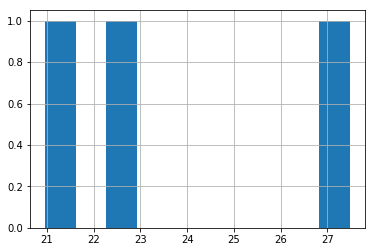

In [15]:
experiment_level.total_time.hist()

In [16]:
experiment_level.total_time.describe()

count     3.000000
mean     23.628983
std       3.413155
min      20.967217
25%      21.704983
50%      22.442750
75%      24.959867
max      27.476983
Name: total_time, dtype: float64

In [17]:
(trial_level.seconds_spent_typing).describe()

count    36.000000
mean     49.932333
std      19.760730
min      17.880000
25%      35.577750
50%      47.685500
75%      62.431000
max      91.896000
Name: seconds_spent_typing, dtype: float64

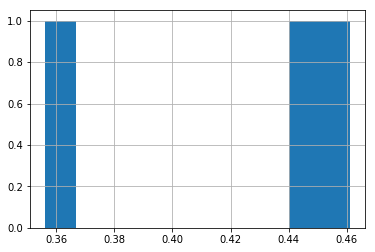

In [18]:
# Fraction of time spent actually typing
((trial_level.groupby('participant').seconds_spent_typing.sum() / 60) / trial_level.groupby('participant').total_time.mean()).hist()

In [19]:
for kind in 'experiment block trial'.split():
    analyses[f'{kind}_level'].to_csv(f'data/analyzed/{kind}_{batch}.csv')

In [20]:
import seaborn as sns

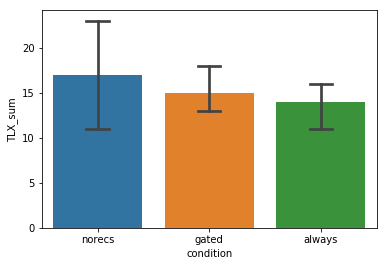

In [21]:
sns.barplot(x='condition', y='TLX_sum', data=block_level, capsize=.2)

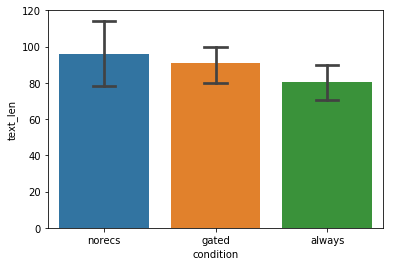

In [22]:
sns.barplot(x='condition', y='text_len', data=trial_level, capsize=.2)

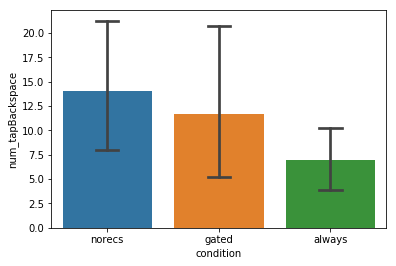

In [23]:
sns.barplot(x='condition', y='num_tapBackspace', data=trial_level, capsize=.2)

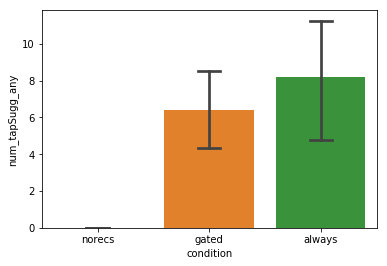

In [25]:
sns.barplot(x='condition', y='num_tapSugg_any', data=trial_level, capsize=.2)

In [26]:
# summarize('2018-05-02')

In [27]:
len(trial_level.text), len(set(trial_level.participant))

(36, 3)

In [28]:
len(trial_level), len(block_level)

(36, 9)

In [29]:
helpful_ranks_by_condition

name,accurate-least-condition,accurate-most-condition,quick-least-condition,quick-most-condition,specific-least-condition,specific-most-condition
always,0,2,0,2,0,2
gated,0,1,1,1,0,1
norecs,3,0,2,0,3,0


In [133]:
helpful_ranks_by_idx

name,accurate-least-idx,accurate-most-idx,quick-least-idx,quick-most-idx,specific-least-idx,specific-most-idx
0,2,0,0,1,2,0
1,1,1,2,1,1,1
2,0,2,1,1,0,2


In [134]:
experiment_level['NFC'].describe()

count    3.000000
mean     0.250000
std      0.193132
min      0.080000
25%      0.145000
50%      0.210000
75%      0.335000
max      0.460000
Name: NFC, dtype: float64

In [135]:
experiment_level['Extraversion'].describe()

count    3.000000
mean     0.186667
std      0.166533
min      0.000000
25%      0.120000
50%      0.240000
75%      0.280000
max      0.320000
Name: Extraversion, dtype: float64